<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/master/examples/crime_sim_poisson_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# notebook for import our crime sim module and running some tests

## Notes on running

For this to run successfully follow these steps:


1.   Git clone the repo into the root dir
2.   Run pip install within the downloaded repo
3.   Reset the local runtime to allow for pip packages installed to work
4.   Then run python setup.py install on downloaded repo

The package should now be useable within the notebook.



In [3]:
%cd ~/

! git clone https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 230, done.
remote: Counting objects: 100% (230/230), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 230 (delta 120), reused 180 (delta 74), pack-reused 0
Receiving objects: 100% (230/230), 19.67 MiB | 22.63 MiB/s, done.
Resolving deltas: 100% (120/120), done.


In [4]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 215kB 4.2MB/s 
     |████████████████████████████████| 92kB 27.7MB/s 
     |████████████████████████████████| 13.1MB 50.4MB/s 
     |████████████████████████████████| 20.4MB 1.7MB/s 
     |████████████████████████████████| 10.5MB 32.6MB/s 
     |████████████████████████████████| 235kB 47.2MB/s 
     |████████████████████████████████| 512kB 47.7MB/s 
     |████████████████████████████████| 61kB 22.9MB/s 
     |████████████████████████████████| 153kB 44.5MB/s 
ERROR: kaggle 1.5.5 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 4.5.4 which is incompatible.
ERROR: datascience 0.

# RESTART RUNTIME

In [1]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit
zip_safe flag not set; analyzing archive contents...


In [2]:
import crime_sim_toolkit.poisson_sim as Poisson_sim
import os
import sys


sim1 = Poisson_sim.Poisson_sim(LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], timeframe='Day')

Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  0
No files found in data folder.
Defaulting to test data.
Psuedo days allocated to all reports.


In [3]:
sim1.data.head()

,Counts,Crime_type,Day,LSOA_code,Mon,Year
0,1,Anti-social behaviour,26,E01010568,7,2016
1,2,Anti-social behaviour,1,E01010569,7,2016
2,2,Anti-social behaviour,8,E01010569,7,2016
3,2,Anti-social behaviour,18,E01010569,7,2016
4,2,Anti-social behaviour,23,E01010569,7,2016


In [5]:
test_data = sim1.out_of_bag_prep(sim1.data)

train_data = sim1.oob_train_split(sim1.data, test_data)


The passed data does not appear to have a full years (Jan-Dec) worth of data.
Defaulting to select out-of-bag sample for most recent year.


In [6]:
%%time

datat = sim1.SimplePoission(train_data, test_data)

Beginning sampling.
Month: 7 Day: 1
Month: 7 Day: 2
Month: 7 Day: 3
Month: 7 Day: 4
Month: 7 Day: 5
Month: 7 Day: 6
Month: 7 Day: 7
Month: 7 Day: 8
Month: 7 Day: 9
Month: 7 Day: 10
Month: 7 Day: 11
Month: 7 Day: 12
Month: 7 Day: 13
Month: 7 Day: 14
Month: 7 Day: 15
Month: 7 Day: 16
Month: 7 Day: 17
Month: 7 Day: 18
Month: 7 Day: 19
Month: 7 Day: 20
Month: 7 Day: 21
Month: 7 Day: 22
Month: 7 Day: 23
Month: 7 Day: 24
Month: 7 Day: 25
Month: 7 Day: 26
Month: 7 Day: 27
Month: 7 Day: 28
Month: 7 Day: 29
Month: 7 Day: 30
Month: 7 Day: 31
CPU times: user 16min 58s, sys: 10.7 s, total: 17min 9s
Wall time: 16min 52s


In [14]:
datat.head()

,Day,Mon,Crime type,Counts,LSOA_code
0,1,7,Anti-social behaviour,1,E01010569
1,1,7,Anti-social behaviour,3,E01010577
2,1,7,Anti-social behaviour,0,E01010590
3,1,7,Anti-social behaviour,0,E01010595
4,1,7,Anti-social behaviour,0,E01010601


Root mean squared error of poisson sampler:  1.2
Mean absolute error:  0.7
Median absolute error:  0.0


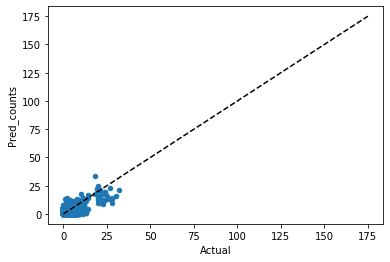

In [37]:
diff_table = sim1.error_Reporting(test_data=test_data, simulated_data=datat)